Website Link (Hosted on GitHub Pages)

https://rohangd03.github.io/Medical_Insurance_Prdiction/

What this code contains:
- A Linear Regression model built from scratch based on given dataset
- Predict Medical charges based on user input

## [1] Importing dependencies

In [29]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

## [2] Data Collection and Analysis

In [2]:
# Loading the dataset
dataset = pd.read_csv('data_insurance.csv')

# Reading the dataset
# Getting an overview of the dataset
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Number of rows and columns in the dataset
dataset.shape

(1338, 7)

In [4]:
# Getting information about the columns in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical columns:
- Sex
- Smoker
- Region

In [5]:
# Looking for missing data
dataset.isnull().sum()

# Result shows no missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Visualization of the data parameters - Age, BMI and Sex

Observations: <br>
Age: Maximum patients are young adults ~ 20 years old <br>
BMI: Median = 30 <br>
Sex: Males and Females almost in equal proportion <br>

<Figure size 600x600 with 0 Axes>

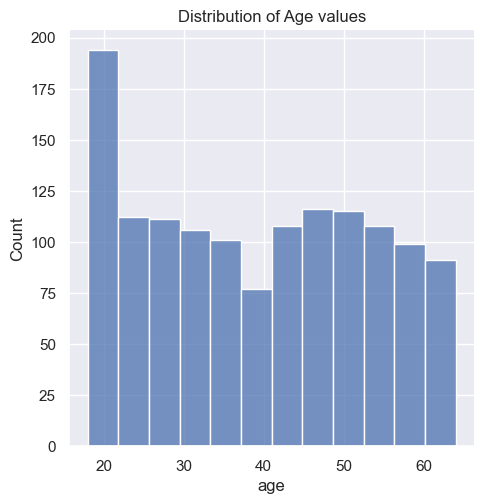

<Figure size 600x600 with 0 Axes>

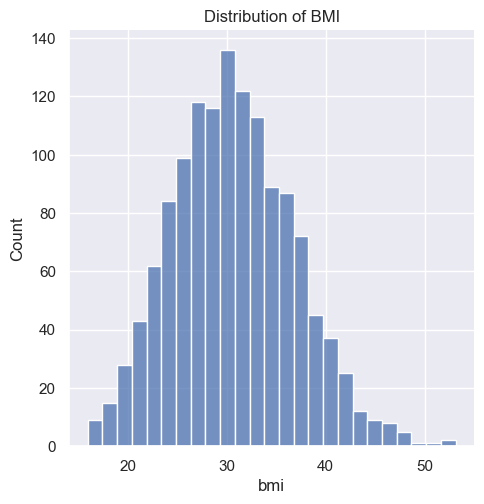

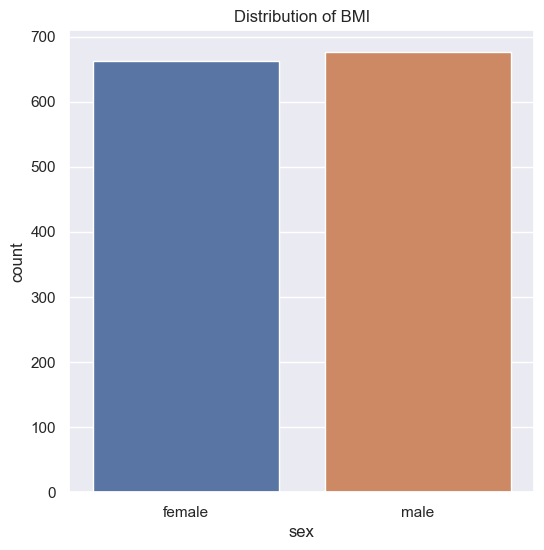

In [7]:
# Distribution of Age values
sns.set()
plt.figure(figsize=(6, 6))
sns.displot(dataset['age'])
plt.title('Distribution of Age values')
plt.show()

# Distribution of BMI values
sns.set()
plt.figure(figsize=(6, 6))
sns.displot(dataset['bmi'])
plt.title('Distribution of BMI')
plt.show()

# Distribution of gender
sns.set()
plt.figure(figsize=(6, 6))
sns.countplot(x = 'sex', data = dataset)
plt.title('Distribution of BMI')
plt.show()

In [8]:
# No. of occurences of each gender

dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

### No. of Children distribution

Observation: Majority of patients do not have children

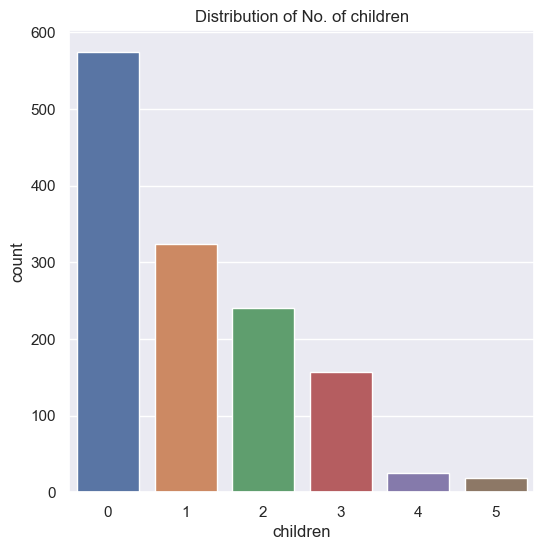

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [9]:
# Count plot of no. of children values
sns.set()
plt.figure(figsize = (6, 6))
sns.countplot(x = 'children', data = dataset)
plt.title('Distribution of No. of children')
plt.show()

# Data regarding distribution of no. of children
dataset['children'].value_counts()

### Smoking habits distribution

Observation: More non smokers than smokers

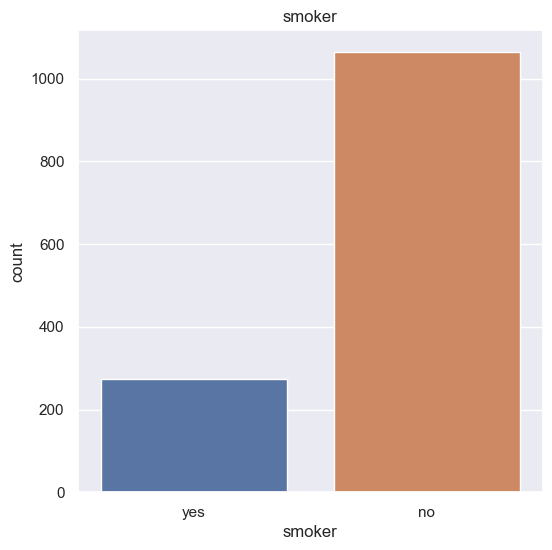

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
sns.set()
plt.figure(figsize = (6, 6))
sns.countplot(x = 'smoker', data = dataset)
plt.title('smoker')
plt.show()

dataset['smoker'].value_counts()

### Distribution of patients by region  

Observation: More patients are from the south-east, rest are evenly divided among the three regions

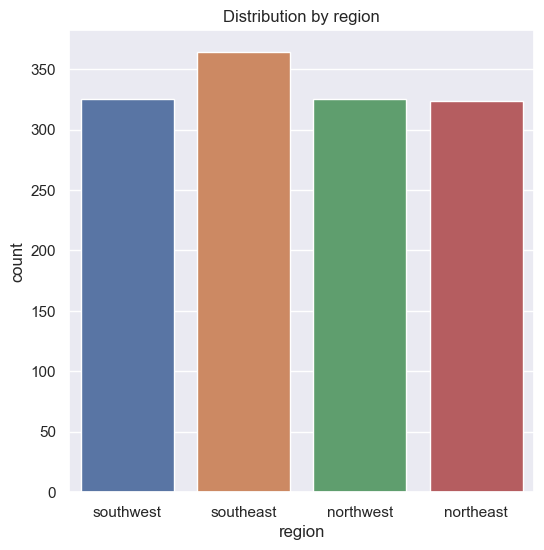

In [11]:
sns.set()
plt.figure(figsize = (6, 6))
sns.countplot(x = 'region', data = dataset)
plt.title('Distribution by region')
plt.show()

Distribution of charges/expenses

<Figure size 600x600 with 0 Axes>

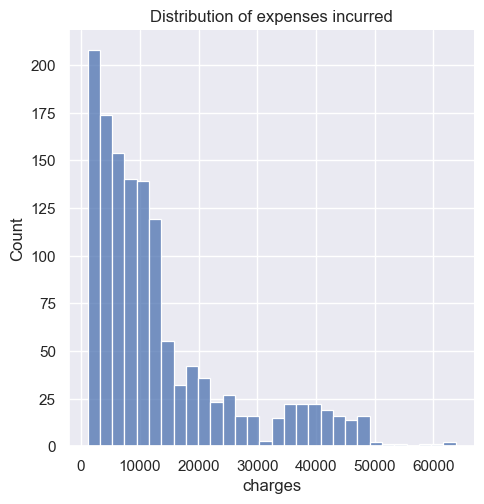

In [12]:
plt.figure(figsize = (6, 6))
sns.displot(dataset['charges'])
plt.title('Distribution of expenses incurred')
plt.show()

## [3] Convert categorical variables to Numerical values

In [13]:
dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace = True)
dataset.replace({'smoker': {'yes': 1, 'no': 0}}, inplace = True)
dataset.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace = True)

Store MAX and MIN values from each parameter

In [14]:
dataset_ = dataset

age_min = dataset_['age'].min()
age_max = dataset_['age'].max()
bmi_min = dataset_['bmi'].min()
bmi_max = dataset_['bmi'].max()
children_min = dataset_['children'].min()
children_max = dataset_['children'].max()
charges_min = dataset_['charges'].min()
charges_max = dataset_['charges'].max()

age_values = [age_min, age_max]
sex_values = [0, 1]
bmi_values = [bmi_min, bmi_max]
children_values = [children_min, children_max]
smoker_values = [0, 1]
region_values = [0, 3]
charges_values = [charges_min, charges_max]

dataset_ranges = np.array([age_values, sex_values, bmi_values, children_values, smoker_values, region_values])
print(dataset_ranges)

[[18.   64.  ]
 [ 0.    1.  ]
 [15.96 53.13]
 [ 0.    5.  ]
 [ 0.    1.  ]
 [ 0.    3.  ]]


Normalize the columns

In [15]:
# Function to normalize a column

def normalize_column(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

In [16]:
dataset['age'] = normalize_column(dataset['age'])
dataset['sex'] = normalize_column(dataset['sex'])
dataset['bmi'] = normalize_column(dataset['bmi'])
dataset['children'] = normalize_column(dataset['children'])
dataset['smoker'] = normalize_column(dataset['smoker'])
dataset['region'] = normalize_column(dataset['region'])
dataset['charges'] = normalize_column(dataset['charges'])

### Splitting the FEATURES and the TARGET

In [17]:
x = dataset.drop(columns = 'charges', axis = 1)
y = dataset['charges']

x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

### Splitting the dataset into TRAINING and TESTING

- random_state shuffles the data before splitting it
- The dataset is split into 80% for training and 20% for testing

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

print("Training dataset = ", (x_train.shape[0]/x.shape[0])*100, "%")
print("Testing dataset = ", (x_test.shape[0]/x.shape[0])*100, "%")

Training dataset =  79.97010463378177 %
Testing dataset =  20.029895366218238 %


## Linear Regression MODEL TRAINING

In [19]:
learning_rate = 0.001
iterations = 5000
error_list = []

weights = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
weights = weights.reshape(-1, 1)

for i in range(iterations):
    prediction = np.dot(x_train, weights)
    error = prediction - y_train
    error_list.append(error.mean())

    # Minimum error BREAK condition
    if(abs(error_list[i]) > abs(error_list[i-1])):
        break

    delta = np.dot(x_train.T, error)/len(y_train)
    weights = weights - learning_rate * delta

weights_list = weights.tolist()
columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

for i in range(6):
    print(f"{columns[i]} : weight = {weights_list[i]}")

age : weight = [0.13008869592869882]
sex : weight = [0.025958570280473284]
bmi : weight = [0.0999625389020312]
children : weight = [0.047311752935391825]
smoker : weight = [0.23563099742923793]
region : weight = [0.04601299740598737]


## OBSERVATIONS

Most significant factor = "smoker" <br>
Least significant factor = "sex"

Plot reduction in error with iterations

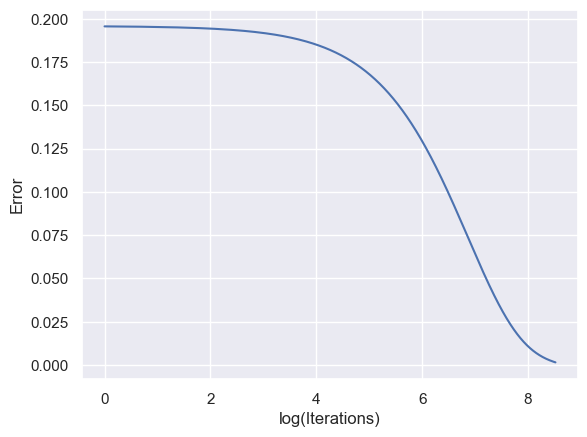

In [20]:
rng = np.arange(1, len(error_list) + 1)
rng = np.log(rng)
error_list = np.array(error_list)
error_list = np.abs(error_list)

plt.plot(rng, error_list)
plt.xlabel("log(Iterations)")
plt.ylabel("Error")
plt.show()

$R^2$ value for training data

In [21]:
y_mean = np.mean(y_train)

# Mean of actual y values
ss_tot = np.sum((y_train - y_mean) ** 2)

# Residual sum of squares
ss_res = np.sum((y_train - prediction) ** 2)

# Calculate R^2 value
r_squared = 1 - (ss_res / ss_tot)

print(f"R^2 value for training data: {r_squared:.4f}")

R^2 value for training data: 0.6255


Mean squared error on TRAINING data

In [22]:
mse = 0.0
for i in range(len(prediction)):
    mse = mse + ((prediction[i] - y_train[i])**2).item()

print(f"Mean square error for  training data = {mse:0.2f}")

Mean square error for  training data = 14.86


### Accuracy on Testing data

In [23]:
y_predictions = np.dot(x_test, weights)

sum_test = np.sum(y_test)
sum_prediction = np.sum(y_predictions)
bias = abs((sum_test - sum_prediction)/sum_test)
accuracy = 1 - bias

print(f"Accuracy = {accuracy*100:0.2f} %")

Accuracy = 98.60 %


$R^2$ value for TESTING data

In [1]:
y_mean = np.mean(y_test)

# Mean of actual y values
ss_tot = np.sum((y_test - y_mean) ** 2)

# Residual sum of squares
ss_res = np.sum((y_test - y_predictions) ** 2)

# Calculate R^2 value
r_squared = 1 - (ss_res / ss_tot)

print(f"R^2 value for training data: {r_squared:.4f}")

NameError: name 'np' is not defined

Mean squared error for TESTING DATA

In [25]:
mse = 0.0
for i in range(len(y_predictions)):
    mse = mse + ((y_predictions[i] - y_test[i])**2).item()

print(f"Mean square error for testing data = {mse:0.2f}")

Mean square error for testing data = 3.80


## TESTING ON INPUT PARAMETERS

In [26]:
age = float(input("Enter age: "))
sex = int(input("Enter sex (0 for male/1 for female): "))
bmi = float(input("Enter BMI: "))
children = int(input("Enter number of children: "))
smoker = int(input("Enter smoker status (0 for non-smoker, 1 for smoker): "))
region = int(input("Enter region (0 - southeast, 1 - southwest, 2 - northeast, 3 - northwest): "))

Processing of data before feeding into Linear Regression model

Normalization of Input parameters

In [27]:
input_ = [age, sex, bmi, children, smoker, region]
parameters = []
i = 0

for row in dataset_ranges:
    normalized_input = (input_[i] - row[0])/(row[1] - row[0])
    parameters.append(normalized_input)
    i = i + 1

parameters = np.array(parameters)

## RESULTS

In [28]:
normalized_charges = np.dot(parameters, weights) + bias
actual_charges = (charges_min + normalized_charges * (charges_max - charges_min)).item()

print(f"Predicted Medical Insurance charge: {actual_charges:0.2f} USD")

Predicted Medical Insurance charge: 3795.94 USD
